 ## Este cuaderno esta basado en la leccion 9 de la documentacion de qutip

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [2]:
from IPython.display import HTML
from matplotlib import animation
from qutip import *

In [3]:
N = 25
w = 1 * 2 * np.pi              # oscillator frequency
tlist = np.linspace(0, 4, 101) # periods

In [4]:
#operator 
a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)

In [5]:
# the quantum harmonic oscillator Hamiltonian
H = w * (a.dag() * a +1/2)

In [6]:
c_ops = []
# uncomment to see how things change when disspation is included
# c_ops = [np.sqrt(0.25) * a]

In [7]:
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """
    
    fig, axes = plt.subplots(1, len(op_list), figsize=(14,3))

    for idx, op in enumerate(op_list):
        
        e_op = expect(op, states)
        v_op = variance(op, states)

        axes[idx].fill_between(tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="green", alpha=0.5);
        axes[idx].plot(tlist, e_op, label="expectation")
        axes[idx].set_xlabel('Time')
        axes[idx].set_title(op_title[idx])

    return fig, axes

In [8]:
from base64 import b64encode

def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
    return HTML(video_tag)

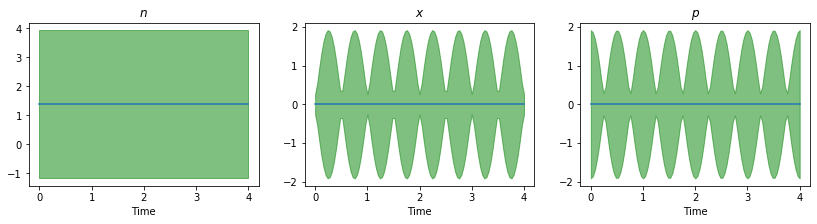

In [9]:
psi0 = squeeze(N, 1.0) * basis(N, 0)
result = mesolve(H, psi0, tlist, c_ops, [])
plot_expect_with_variance(N, [n, x, p], [r'$n$', r'$x$', r'$p$'], result.states);


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

def update(n):
    axes[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=axes)
    
anim = animation.FuncAnimation(fig, update, frames=len(result.states), blit=True)

anim.save('animation-squeezed-vacuum.mp4', fps=10,writer="imagemagick",codec="libx264")

plt.close(fig)


Traceback (most recent call last):
  File "/home/gsuarez/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/gsuarez/miniconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/home/gsuarez/miniconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/gsuarez/miniconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1758, in _draw_frame
    raise RuntimeError('The animation function must return a '
RuntimeError: The animation function must return a sequence of Artist objects.
